# Diferenciación automática: Parte 2

### NOTA

Este notebook se iniciará en la clase y **debe** hacerse en equipo, con los *mismos miembros* que participaron en la "Tarea4.ipynb". La resolución completa de los ejercicios debe ser enviada como "Tarea5.ipynb".

## Funciones elementales

Lo que se logró en la clase pasada fue, esencialmente, tener una manera de obtener primeras
derivadas para cualquier función racional, esto es, cocientes de polinomios en una variable.

El siguiente paso es incluir más funciones a fin de ampliar la aplicabilidad de lo hecho la vez pasada, en particular a las funciones elementales: $\exp$, $\log$, etc.

La extensión a estas funciones es elemental, y así por ejemplo tenemos:

\begin{eqnarray}
\exp[\vec{f}(x_0)] &=& \big( \exp(f_0),\, f'_0\exp(f_0) \,\big),\\
\log[\vec{f}(x_0)] &=& \big( \log(f_0),\, \frac{f'_0}{f_0} \,\big),\\
\sin[\vec{f}(x_0)] &=& \big( \sin(f_0),\, f'_0\cos(f_0) \,\big),\\
\cos[\vec{f}(x_0)] &=& \big( \cos(f_0),\, -f'_0\sin(f_0) \,\big),\\
\tan[\vec{f}(x_0)] &=& \big( \tan(f_0),\, f'_0\sec^2(f_0) \,\big),\\
\sinh[\vec{f}(x_0)] &=& \big( \sinh(f_0),\, f'_0\cosh(f_0) \,\big),\\
...\\
\end{eqnarray}

Vale la pena enfatizar que la regla de la cadena se utiliza en la segunda componente del 
lado derecho de estas ecuaciones.

In [1]:
include("AutomDiff.jl")
# using Base.test
using AD

## Ejercicio

Implementen las funciones relacionadas con potencias, exponenciales, logarítmos, las funciones trigonométricas y las hiperbólicas que tiene Julia definidas (ver la [documentación](http://julia.readthedocs.org/en/release-0.4/manual/mathematical-operations/#trigonometric-and-hyperbolic-functions)). La implementación debe incluir los tests adecuados. La manera en que implementen las cosas debe estar clara en el notebook "Tarea5.ipynb", pero toda la funcionalidad debe ser incluida en "AutomDiff.jl" al igual que en "runtests.jl"

**Hint:** Aprovechen las capacidades de Julia en metaprogramming.

Primero hagamos las funciones $$f(x) = \sqrt x, \  g(x) = ^3\sqrt x$$

In [2]:
import Base: sqrt, cbrt

sqrt(a::Dual) = Dual(sqrt(a.fun),(1//2)*(a.der/sqrt(a.fun)))
cbrt(a::Dual) = Dual(cbrt(a.fun),(1//3)* (a.der/(cbrt(a.fun)^2)))

cbrt (generic function with 9 methods)

Ahora veamos para las funciones exponencial $e^x$ y logaritmo natural $\log x$

In [3]:
import Base: exp, log

exp(a::Dual) = Dual(exp(a.fun), a.der*exp(a.fun))
log(a::Dual) = Dual(log(a.fun), a.der/a.fun)

log (generic function with 20 methods)

Funciones trigonométricas

In [4]:
import Base: sin, cos, tan, cot, sec, csc

sin(a::Dual) = Dual(sin(a.fun), a.der*cos(a.fun))
cos(a::Dual) = Dual(cos(a.fun),-a.der*sin(a.fun))

cos (generic function with 12 methods)

In [5]:
tan(a::Dual) = Dual(tan(a.fun), a.der*sec(a.fun)*sec(a.fun))
cot(a::Dual) = Dual(cot(a.fun), -1*a.der*csc(a.fun)*csc(a.fun))

cot (generic function with 4 methods)

In [6]:
sec(a::Dual) = Dual(sec(a.fun), a.der*tan(a.fun)*sec(a.fun))
csc(a::Dual) = Dual(csc(a.fun), a.der*(-1*cot(a.fun))*csc(a.fun))

csc (generic function with 5 methods)

Finalmente, las hiperbólicas

In [7]:
import Base: sinh, cosh

sinh(a::Dual) = Dual(sinh(a.fun), a.der*cosh(a.fun))
cosh(a::Dual) = Dual(cosh(a.fun), a.der*sinh(a.fun))

cosh (generic function with 13 methods)

In [8]:
import Base: tanh, coth, sech, coth, csch

tanh(a::Dual) = Dual(tanh(a.fun), a.der*sech(a.fun)*sech(a.fun))
coth(a::Dual) = Dual(coth(a.fun), -1*a.der*csch(a.fun)*csch(a.fun))

coth (generic function with 5 methods)

In [9]:
sech(a::Dual) = Dual(sech(a.fun), a.der*tanh(a.fun)*(-1*sech(a.fun)))
csch(a::Dual) = Dual(csch(a.fun), a.der*(-1*coth(a.fun))*csch(a.fun))

csch (generic function with 5 methods)

## Ejercicio

Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

Primero, calculamos la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

In [10]:
f1(x)=sin(x) #definimos dos funciones pues es más ilustrativo utilizar una composición
f2(x)=x^3-2/(x^6) 
a=Dual(2,1) #definimos el dual para evaluar las funciones (x,x'=1), donde x=x0=2 

AD.Dual{Int64}(2,1)

In [11]:
f1(f2(a)) 
#según mathematica debería dar (0.9934213369,-1.384934906), por lo que el principal error es numérico en la derivada

AD.Dual{Float64}(0.9934213368955197,-1.3730060949677063)

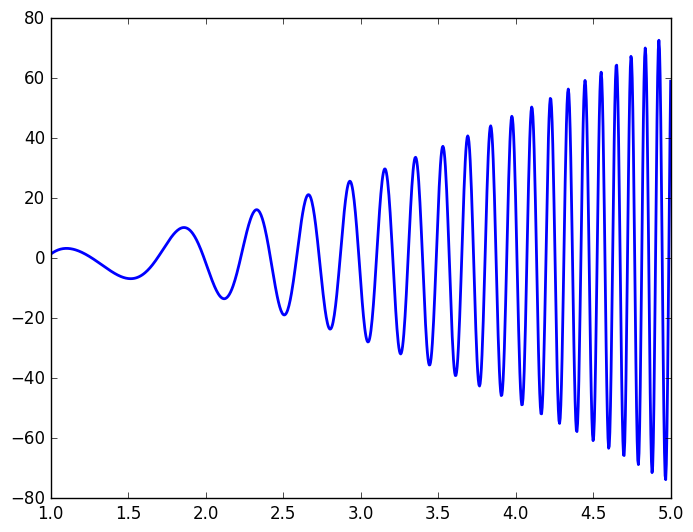

In [21]:
using PyPlot
x = linspace(1,5,1000);  #defino un array para el dominio con 1000 puntos
y = zeros(x) #inicializo un array para y con ceros del mismo tipo que x
for j in 1:length(x)
    y[j]=f1(f2(Dual(x[j],1))).der #y toma el dual evaluado en x y obtiene la derivada evaluada en ese punto
end    
plot(x, y, color="blue", linewidth=2.0, linestyle="-");
show()

# Ejercicio

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable (la función `newton1D` debe tener un argumento que es una función) a fin de encontrar un cero de la función, i.e., $f(x^*)=0$. El método de Newton requiere la derivada evaluada en diversos puntos, cosa que obtendrán usando el módulo de derivación automática.

- Obtengan, usando su función del método de Newton, las raices del polinomio de Wilkinson $W_{6}(x)$, usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [13]:
g(x) = x*sin(2*x) #definimos la función

g (generic function with 1 method)

In [14]:
"""Esta función calcula la raíz de una función f(x) dado un disparo inicial x_0,
utilizando el método de Newton. Regresa el valor de la raíz y el error asociado como BigFloat."""

function newton(f,x0 = 0)
    n = 0 # numero de iteraciones
    nmax = 100 # numero máximo de iteraciones
    eps = 1 # error
    e_admitido = 1e-8 # precisión requerida
    
    while eps > e_admitido && n <= nmax
        
        F = f(xdual(x0)); # definimos nuestro dual
        y = x0 - F.fun/F.der
        
        eps = abs(y-x0) # 
        x0 = y
        n += 1
        
    end
    return (x0, eps)
end

newton (generic function with 2 methods)

Definimos los polinomios de Wilkinson utilizando metaprogramming.

In [15]:
function wilkinson(n::Int)
    nombre(n::Int) = symbol( string("W_", n) )
    # Checo que `n` sea >= 1
    @assert n >= 1
    
    ex = :(x-1)
    for i = 2:n
        ex = :( $ex * ( x-$i) )
    end
    ex_ret = :( $(nombre(n))(x) = $ex )
    eval(ex_ret)
end

wilkinson (generic function with 1 method)

In [16]:
wilkinson(6)

W_6 (generic function with 1 method)

In [17]:
W_6(2.2)

3.6771840000000022

In [18]:
newton(W_6, 2.2)

(2.0,2.799555254284769e-9)

In [19]:
newton(W_6,2.45)

(6.0,6.661338147750939e-14)

In [20]:
newton(g,0.7)

(7.980968568545022e-9,7.980968568545025e-9)

Aquí podemos ver que el cero más cercano de esta función g es $x_0 = 0$, y el valor que nos arroja el método de Newton es del mismo orden (de hecho casi igual) que el error, por esto ya no es posible acercarse más a la raíz de la función.

# Pregunta

¿Qué hacer si se requieren derivadas de orden superior, es decir, la segunda, tercera, etc, derivada? Argumenten.

**NOTA:** Esta pregunta debe ser contestada pero **no** será considerada para aceptar la tarea; la idea es empezar a pensar en esto.

La primera idea es - así como definimos el tipo `Dual` para hablar de la primera derivada - empezar a definir nuevos tipos para la segunda, tercera, etc. derivada, para los cuales se definan métodos para la diferenciación.

El primer problema que sale al hacer esto es la necesidad de determinar manualmente la n-ésima derivada de una función para ser incluida en el n-ésimo tipo: un `nDual`, por así decirlo, que podría tener una estructura de $nDual \equiv (f(x_0, f^{(n)}(x_0)